# Step 1:
#### Importing the required libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
#from sklearn.lda import LDA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import StratifiedKFold
from sklearn.learning_curve import learning_curve
from sklearn.learning_curve import validation_curve
from sklearn.metrics import confusion_matrix
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

/home/stush/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/stush/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


#### Functions to be used

In [2]:
def displayall(df):
    """
    Setting the maximum rows and columns to to 1000.
    This is to enable us view all the features in the data set
    
    """
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

# Step 2
#### Import the data

In [3]:
data = pd.read_csv('/home/stush/Personal Projects/master/data/modelling_data.csv')

# Step 3
#### Clean the data for modelling

In [4]:
#Display all columns
data.columns

Index(['ClientID', 'Loans', 'DefaultedLoans', 'NonPerformingLoans',
       'AvgLoanAmount', 'LastLoanAmount', 'LastLoanPeriod', 'Lending',
       'AvgLendingAmount', 'LastLendingAmount', 'LastLoanOn', 'LastDefaultOn',
       'Createdon', 'Defaulted >  10 Days', 'LastDefault > 10 On',
       'LastRepaymentOn', 'MaxLoanAmount', 'LastDefault > 2on', 'Defaulted>2',
       'CRBListed', 'grade', 'MobileLoansScore',
       'avgMobiLoanPrincipalAmountmySector', 'creditHistorymySector',
       'creditHistoryotherSector', 'lastMobiLoanPrincipalAmountotherSector',
       'maxMobiLoanPrincipalAmountotherSector', 'paAccountsmySector',
       'paAccountsotherSector', 'npaAccountsmySector',
       'npaAccountsotherSector', 'paAccountsWithDhmySector',
       'paAccountsWithDhotherSector', 'LastLoanOnYear', 'LastLoanOnMonth',
       'LastLoanOnDay', 'LastLoanOnDayofweek', 'LastLoanOnIs_month_end',
       'LastLoanOnIs_month_start', 'LastLoanOnIs_quarter_end',
       'LastLoanOnIs_quarter_start', 'LastL

In [5]:
#Drop clientID column as its not needed
model_df_v1 = data.drop(['ClientID'],axis = 1)

In [6]:
# displayall(model_df_v1.head())

In [7]:
#Drop all date columns and grade columns. All these columns were expanded/encode
model_df_v2 = model_df_v1.drop(['LastDefault > 2on','LastLoanOn','Createdon','LastRepaymentOn','grade','LastDefault > 10 On','LastDefaultOn'],axis = 1)

In [8]:
model_df_v2 = model_df_v2[model_df_v2.NonPerformingLoans!=2]

In [9]:
model_df_v2.shape

(9040, 48)

# Step 4
#### Seperate the X variable from the Y variable in the data set

In [10]:
y = model_df_v2['NonPerformingLoans'].values.reshape(-1)

In [11]:
X = model_df_v2.drop(['NonPerformingLoans'],axis = 1)

In [12]:
# displayall(X.head())

In [13]:
X.shape

(9040, 47)

In [14]:
y.shape

(9040,)

# Step 5
#### Preprocessing

In [15]:
#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Step 6
#### Modelling 

In [16]:
# First define the pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=30)),
                    ('clf', LogisticRegression(random_state=1))])

#Pipeline without PCA
NoPCA_pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1))])


In [17]:
#Fitting the model and printing the output
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.888


In [74]:
print('Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))

Train Accuracy: 0.900


In [76]:
print('Train Accuracy: %.3f' % pipe_lr.score(X, y))

Train Accuracy: 0.896


In [18]:
y_pred = pipe_lr.predict(X_test)

In [19]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

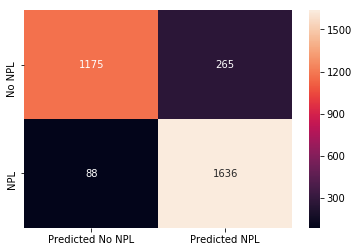

In [20]:
cm = np.array(confmat)
confusion= pd.DataFrame(cm,index =['No NPL','NPL'],columns = ['Predicted No NPL','Predicted NPL']) 
sn.heatmap(confusion,annot = True,fmt ='d')

In [21]:
pipe_lr_v2 = NoPCA_pipe_lr

In [77]:
#Fitting the model and printing the output
pipe_lr_v2.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr_v2.score(X_test, y_test))

Test Accuracy: 0.925


In [81]:
print('Train Accuracy: %.3f' % pipe_lr_v2.score(X_train, y_train))

Train Accuracy: 0.930


In [80]:
print('Whole data Accuracy: %.3f' % pipe_lr_v2.score(X, y))

Whole data Accuracy: 0.929


In [23]:
y_pred_v2 = pipe_lr_v2.predict(X_test)

In [24]:
confmat_v2 = confusion_matrix(y_true=y_test, y_pred=y_pred_v2)

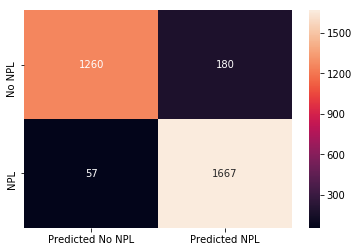

In [25]:
cm = np.array(confmat_v2)
confusion_v2 = pd.DataFrame(cm,index =['No NPL','NPL'],columns = ['Predicted No NPL','Predicted NPL']) 
sn.heatmap(confusion_v2,annot = True,fmt ='d')

In [26]:
#Fitting the model and printing the output
NoPCA_pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.888


In [27]:
y_pred_NoPCA = NoPCA_pipe_lr.predict(X_test)

In [28]:
NoPCA_confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_NoPCA)

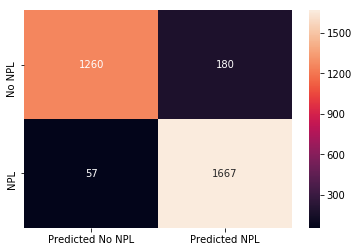

In [29]:
cm = np.array(NoPCA_confmat)
confusion_NoPCA = pd.DataFrame(cm,index =['No NPL','NPL'],columns = ['Predicted No NPL','Predicted NPL']) 
sn.heatmap(confusion_NoPCA,annot = True,fmt ='d')

In [30]:
#Cross validation score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

In [31]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.89813243 0.88435374 0.91496599 0.9047619  0.88435374 0.89608177
 0.89778535 0.88586031 0.89778535 0.91311755]


In [32]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.898 +/- 0.010


In [33]:
#Cross validation score
scores_v2 = cross_val_score(estimator=pipe_lr_v2,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)

In [34]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_v2),np.std(scores_v2)))

CV accuracy: 0.928 +/- 0.006


In [35]:
#Define second pipeline
pipe_lr2 = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(penalty='l2', random_state=0))])

In [57]:
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr2,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=1)

In [58]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [59]:
train_mean

array([0.9217803 , 0.92857143, 0.93272383, 0.93088931, 0.93110102,
       0.93206179, 0.93124324, 0.93012533, 0.92925599, 0.92994137])

In [60]:
train_std

array([0.00965909, 0.00492049, 0.00400812, 0.00298013, 0.00211644,
       0.0018069 , 0.00100546, 0.00173522, 0.00122982, 0.00112282])

In [61]:
test_mean

array([0.89890798, 0.90826694, 0.91899223, 0.92239475, 0.92477745,
       0.92682   , 0.92716101, 0.9275023 , 0.92852213, 0.92750085])

In [62]:
test_std

array([0.01213229, 0.00759593, 0.00777494, 0.00793071, 0.00697946,
       0.00754338, 0.0054803 , 0.00627746, 0.00668467, 0.0059629 ])

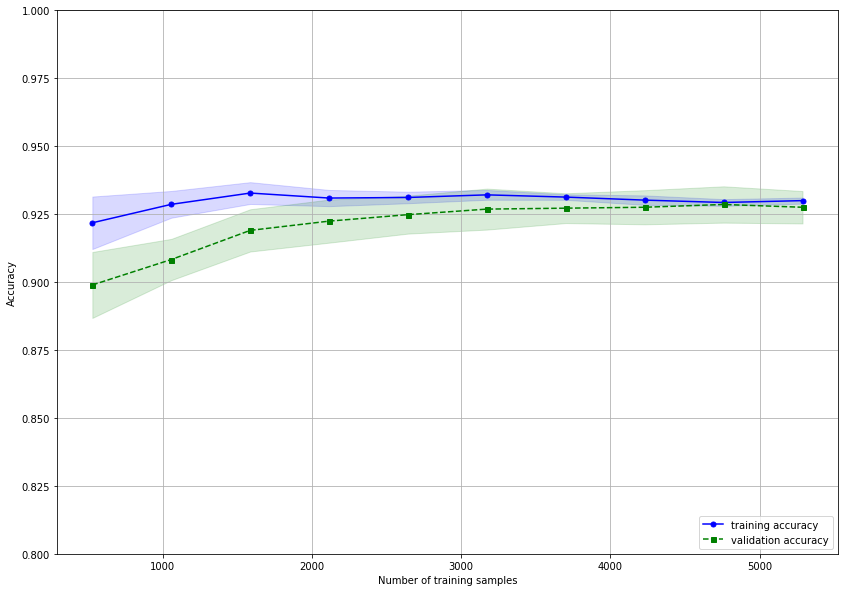

In [63]:
plt.figure(figsize = (14,10))


plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5,
         label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [64]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores2, test_scores2 = validation_curve(estimator=pipe_lr2,
                                             X=X_train,
                                             y=y_train,
                                             param_name='clf__C',
                                             param_range=param_range,
                                             cv=10)

In [65]:
train_mean2 = np.mean(train_scores2, axis=1)
train_std2 = np.std(train_scores2, axis=1)
test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)

In [66]:
train_mean2

array([0.86334239, 0.90535885, 0.92708571, 0.92994102, 0.93035702,
       0.93056501])

In [67]:
train_std2

array([0.00125064, 0.00175833, 0.00094564, 0.00114665, 0.00130667,
       0.00102091])

In [68]:
test_mean2

array([0.86214892, 0.90333814, 0.92562808, 0.92750085, 0.92835235,
       0.92835264])

In [69]:
test_std2

array([0.01013255, 0.0130314 , 0.00571967, 0.0059629 , 0.00715816,
       0.00673887])

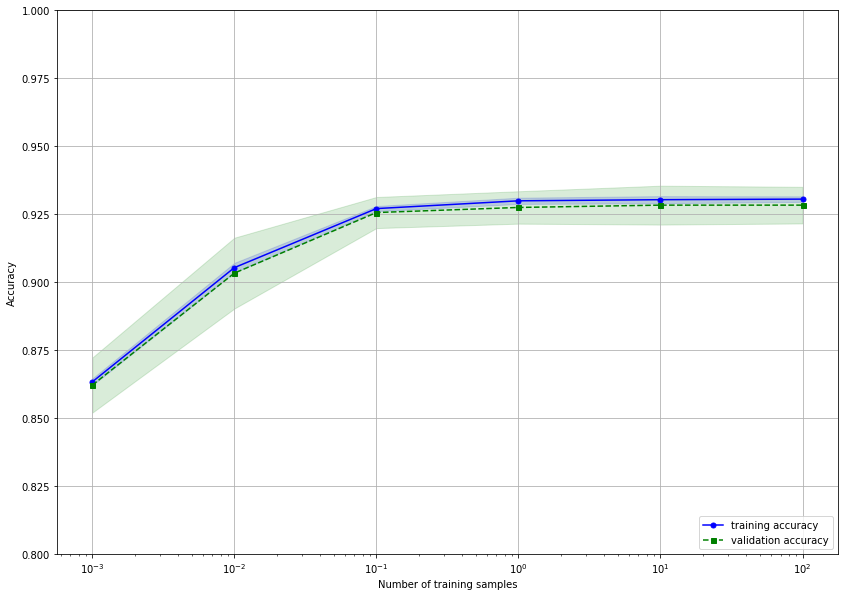

In [70]:
plt.figure(figsize = (14,10))

plt.plot(param_range, 
         train_mean2,
         color='blue', 
         marker='o',
         markersize=5,
         label='training accuracy')

plt.fill_between(param_range, 
                 train_mean2 + train_std2,
                 train_mean2 - train_std2, alpha=0.15,
                 color='blue')

plt.plot(param_range, 
         test_mean2,
         color='green', 
         linestyle='--',
         marker='s', 
         markersize=5,
         label='validation accuracy')

plt.fill_between(param_range,
                 test_mean2 + test_std2,
                 test_mean2 - test_std2,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()